# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

## Exercicio 3 - Adaline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd

### Treinamento Adaline

In [206]:
def trainAdaline(xin, yd, eta, tol, maxepocas, par):
# xin : matriz Nxn com os dados de entrada
# yd: rótulos de saída (0 ou 1)
# eta : passo de treinamento
# tol : tolerância de erro
# maxepocas: número máximo de iterações par : parâmetro de entrada .
# # par=0 ==> xin tem dimensão n+1 e já inclui
# # entrada correspondente ao termo
# # de polarização.
# # par=1 ==> xin tem dimensão n e não inclui

    xin = pd.DataFrame(xin)
    yd = pd.DataFrame(yd)

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        wt = pd.DataFrame(np.random.sample(nDimension+1) - 0.5)
        xin.insert(nDimension, nDimension, 1)
    else:
        wt = pd.DataFrame(np.random.sample(nDimension) - 0.5)

    nepocas = 0 # Contador de epocas
    eepoca = tol + 1 # Acumulador de erro de epocas

    evec = [maxepocas] # Vetor de erros

    # Laço principal de treinamento
    while (nepocas < maxepocas) & (eepoca > tol):
        ei2 = 0
        #Sequencia aleatória de treinamento
        xseq = np.random.randint(0, nSamples, nSamples)

        for i in range(nSamples):

            # Amostra dado da sequencia aleatória
            irand = xseq[i]

            # Calcula saída do Adaline
            yhati = 1.0 * np.dot(wt.T, pd.DataFrame(xin.loc[irand])) # yhati = xin[i] X wt.T
            yhati = pd.DataFrame(yhati)

            # Calcula erro
            ei = yd.loc[irand] - yhati        # erro: ei = (yi − yˆi)
            ei = pd.to_numeric(ei[0][0])

            # Calcula variaçao no peso
            dw = eta * (ei * xin.loc[irand])  # dw = η ei xis
            dw = pd.DataFrame(dw).to_numpy()

            # Ajusta vetor de pesos
            wt = pd.DataFrame(wt).to_numpy()
            wt = wt + dw                     # w(t+1) = w(t) + dw(t) 
            
            # Acumula erro por época
            ei2 += ei**2 

        # Incrementa número de épocas
        nepocas = nepocas + 1
        evec.append(ei2/nSamples)

        # Armazena erro por época
        eepoca = evec[nepocas]

    # Retorna vetores de pesos e de erros
    retlist = [wt, evec[1:nepocas]]

    return retlist
    

### Estudo Slides

Suponha que a fun ̧c ̃ao f(x) represente um processo industrial que aumenta em 4 vezes a magnitude de qualquer sinal em sua entrada e adiciona duas unidades ao valor obtido.

f(x) = 4x + 2

w:  [[3.87295428]
 [1.99518865]]


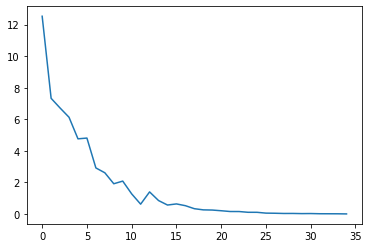

In [209]:
t = np.arange(0, 2*np.pi, 0.1*np.pi)
x = np.sin(t)
y = 4*x + 2

retlist = trainAdaline(x,y,0.01,0.01,50,1)
w = retlist[0]
erro = retlist[1]

plt.plot(erro)
print("w: ", w)


### Problema multivariado

f(x4,x3,x2,x1) = a4x4 + a3x3 + a2x2 + a1x1 + a0x0

y = 3.2x4 + 0.8x3 + 2x2 + x1 + pi


w:  [[1.01577848]
 [2.1843365 ]
 [0.83094734]
 [2.29236109]
 [2.02149437]]


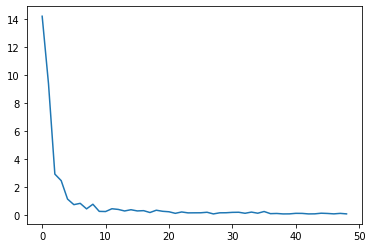

In [208]:
t = np.arange(0, 2*np.pi, 0.1*np.pi)

x1 = pd.Series(np.sin(t)+np.cos(t))
x2 = pd.Series(np.tanh(t))
x3 = pd.Series(np.sin(4*t))
x4 = pd.Series(abs(np.sin(t)))

x = pd.concat([x1,x2,x3,x4], axis=1)
y = x1 + 2*x2 + 0.8*x3 + 3.2*x4 + np.pi/2

retlist = trainAdaline(x,y,0.01,0.01,50,1)

w = retlist[0]
erro = retlist[1]

plt.plot(erro)
print("w: ", w)
